## Template - XGBoost Classification
Dataset - Sklearn breast cancer data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 200)

In [3]:
!cd

C:\Users\Starl\Documents\William Project\Machine Learning


## Load Data

In [5]:
data = load_breast_cancer()

In [6]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [7]:
df['target'] = data.target

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.shape

(569, 31)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Data Explore

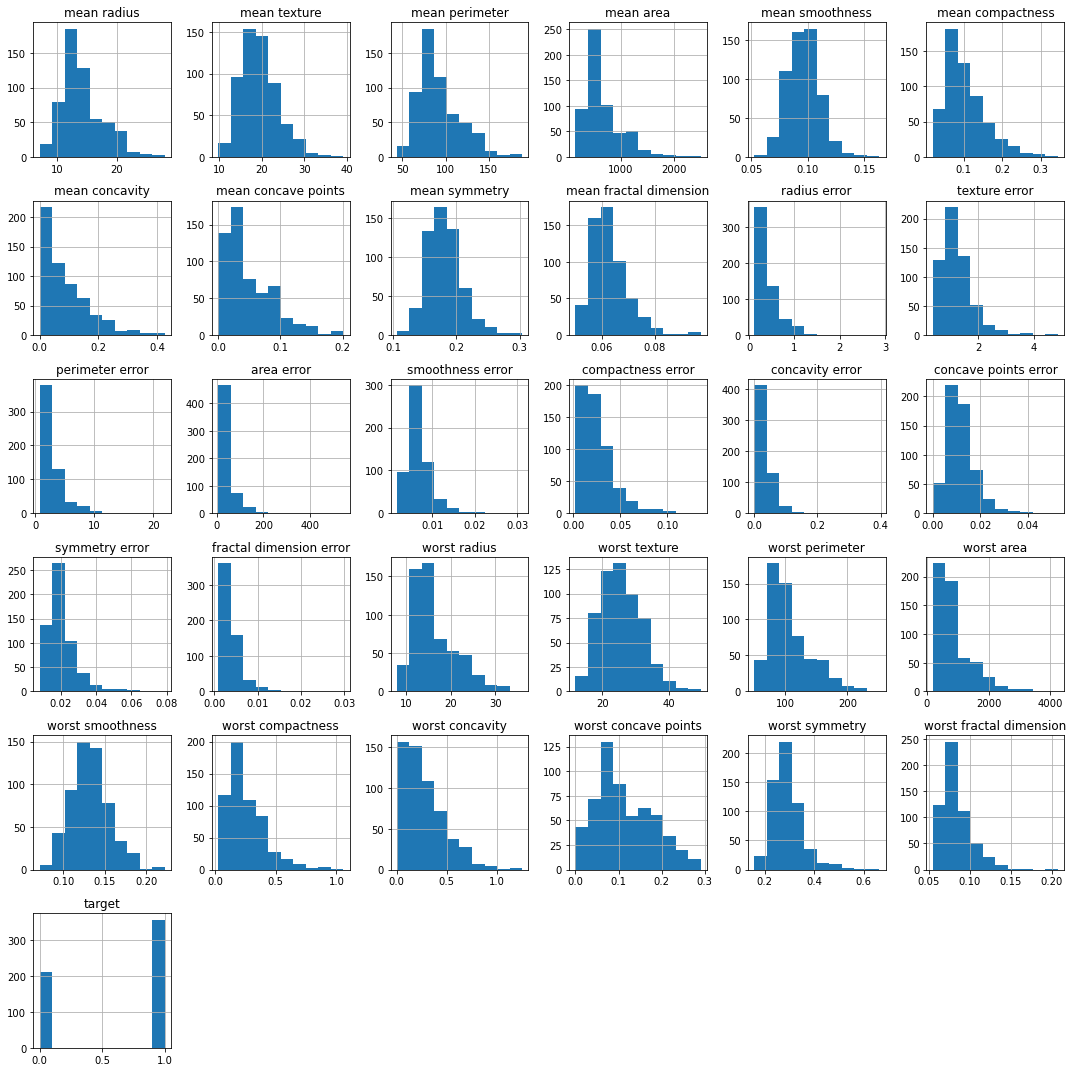

In [11]:
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

## Data Preprocessing & Feature Engineering

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss, classification_report

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=5)

In [17]:
cls = xgb.XGBClassifier(objective="binary:logistic",
                        n_estimators=150,
                        max_depth=10)

In [28]:
cls.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_validation, y_validation)],
        early_stopping_rounds=10)

[20:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.46266	validation_1-logloss:0.48666
[1]	validation_0-logloss:0.33731	validation_1-logloss:0.36285
[2]	validation_0-logloss:0.24827	validation_1-logloss:0.29257
[3]	validation_0-logloss:0.18876	validation_1-logloss:0.23916
[4]	validation_0-logloss:0.14738	validation_1-logloss:0.19781
[5]	validation_0-logloss:0.11685	validation_1-logloss:0.17430
[6]	validation_0-logloss:0.09305	validation_1-logloss:0.15610
[7]	validation_0-logloss:0.07599	validation_1-logloss:0.14289
[8]	validation_0-logloss:0.06218	validation_1-logloss:0.13271
[9]	validation_0-logloss:0.05253	validation_1-logloss:0.12232
[10]	validation_0-logloss:0.04475	validation_1-logloss:0.11441
[11]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
eval_result = cls.evals_result()

In [30]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

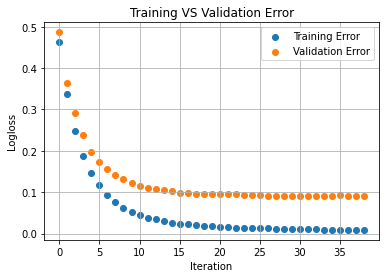

In [31]:
plt.scatter(x=training_rounds, y=eval_result['validation_0']['logloss'], label="Training Error")
plt.scatter(x=training_rounds, y=eval_result['validation_1']['logloss'], label="Validation Error")
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Logloss")
plt.title("Training VS Validation Error")
plt.legend()
plt.show()

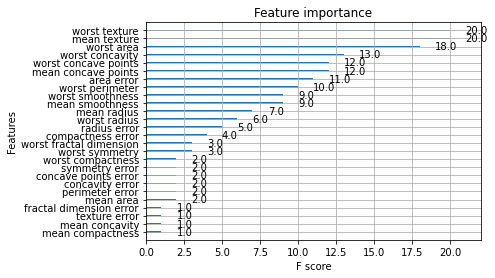

In [32]:
xgb.plot_importance(cls)
plt.show()

In [33]:
predictions = cls.predict(X_validation)

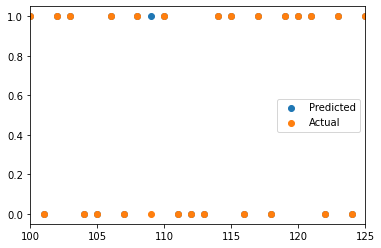

In [43]:
iteration = range(len(predictions))
plt.scatter(iteration, predictions, label="Predicted")
plt.scatter(iteration, y_validation, label="Actual")
plt.legend()
plt.xlim([100, 125])
plt.show()

In [45]:
print("ROC_AUC score: ", roc_auc_score(y_validation, predictions))
print("LogLoss score: ", log_loss(y_validation, predictions))

ROC_AUC score:  0.9754098360655737
LogLoss score:  0.6059574735498409


In [50]:
print(classification_report(y_validation, predictions, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.95      0.97        61
      benign       0.97      1.00      0.99       110

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

